# Steady frictional flow through a constant-area duct
This notebook demonstrates the use of tools for computing flow through a constant-area
 duct with frictional effects, also known as **Fanno flow**

### Set up the module

In [1]:
using Gasdynamics1D

In [2]:
using Plots
using LaTeXStrings

### Some general aspects of Fanno flow
Most calculations with frictional flow involve the relationship between Mach
number and the reference length $L^*$, representing the length required from that
point to bring the flow to Mach number equal to 1. The relationship is based on
the dimensionless parameter

$$ \dfrac{f L^*}{D}$$

where $f$ is the Darcy friction factor and $D$ is the duct diameter. Let's plot
 this relationship for air:

In [3]:
Mrange = range(0.1,8,length=801)
fLDarray = []
for M in Mrange
    push!(fLDarray,value(FLStarOverD(MachNumber(M),FannoFlow,gas=Air)))
end

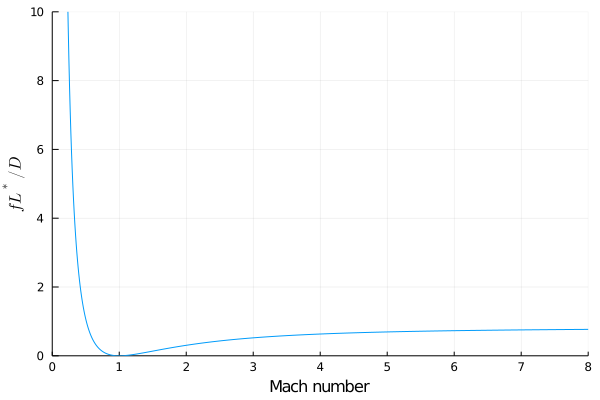

In [4]:
plot(Mrange,fLDarray,xlim=(0,8),ylim=(0,10),xticks=0:1:8,xlabel="Mach number",ylabel=L"fL^*/D",legend=false)

Notice that the reference length goes to zero at Mach number 1, as it should, by
its definition. It should also be noted that there are a few values of $fL^*/D$ for
which there are two possible Mach numbers---one subsonic and one supersonic. This
is analogous to the situation in isentropic flow with area changes.
### Example 1
Flow enters a duct of diameter 2 cm at Mach number equal to 0.1 and leaves at
Mach number equal to 0.5. Assume that the friction factor is equal to 0.024 throughout.

(a) What is the length of the duct?

(b) How much longer would the duct have to be to reach Mach number equal to 1 at the exit?
First, we use $M_1 = 0.1$ to calculate $f L_1^*/D$. We will do the same with $M_2$
 to calculate $f L_2^*/D$. The actual length $L$ is given by the difference between
 $L_1^*$ and $L_2^*$.

In [5]:
f = FrictionFactor(0.024)
D = Diameter(2,units=CM)

Diameter = 0.02 Meters

In [6]:
M1 = MachNumber(0.1)
fL1star_over_D = FLStarOverD(M1,FannoFlow)

FLOverD = 66.9216 

In [7]:
M2 = MachNumber(0.5)
fL2star_over_D = FLStarOverD(M2,FannoFlow)

FLOverD = 1.06906 

Now calculate $L_1^*$ and $L_2^*$, and $L$ from their difference:

In [8]:
L1star = Length(fL1star_over_D*D/f)
L2star = Length(fL2star_over_D*D/f)
L = Length(L1star-L2star)

Length = 54.8771 Meters

The additional length needed to bring the flow to Mach number 1 is, by definition, $L_2^*$:

In [9]:
L2star

Length = 0.890884 Meters

So we only need 0.89 m more to bring the flow to sonic (choked) conditions.

###  Example 2
Consider a flow of air through a circular pipe of diameter 3 cm, starting at
stagnation pressure 200 kPa, stagnation temperature 500 K, and velocity 100 m/s.
The friction factor in the pipe can be assumed to be 0.02 throughout.

(a) What length of pipe would be needed to drive the flow to Mach number 1 at the exit?

(b) What is the mass flow rate through the pipe at those conditions?

(c) Suppose the pipe were 30 m long. How would the mass flow rate change?

For (a), we are seeking $L_1^*$. First set the known conditions:

In [10]:
D = Diameter(3,units=CM)
p01 = StagnationPressure(200,units=KPa)
T01 = StagnationTemperature(500)
u1 = Velocity(100)
f = FrictionFactor(0.02)

FrictionFactor = 0.02 

Now calculate the Mach number at the entrance. For this, we need $c_1$, the speed
of sound. We get this by using the known stagnation temperature $T_{01} = 500$ K
and velocity $u_1 = 100$ m/s. We will calculate the temperature $T_1$ from these
(using $h_1 = h_{01} - u_1^2/2$), and $c_1$ from that:

In [11]:
h01 = StagnationEnthalpy(T01)
h1 = Enthalpy(h01,u1) # this computes h1 = h01 - u1^2/2
T1 = Temperature(h1)
c1 = SoundSpeed(T1)
M1 = MachNumber(u1/c1)

MachNumber = 0.224224 

Now we can compute $fL_1^*/D$ and then $L_1^*$. This is what we seek.

In [12]:
fL1starD = FLStarOverD(M1,FannoFlow)
L1star = Length(fL1starD*D/f)

Length = 16.6163 Meters

so we need a pipe of 16.6 m to reach Mach number 1.

Now let's compute the mass flow rate. We need the area and density. For the density,
we will first get the stagnation density (from $p_{01}$ and $T_{01}$) and then get
 density from the isentropic relation. (We are not using isentropic relations
 between two different points in the duct; we are using it to relate *local*
 stagnation conditions to *local* conditions.)

In [13]:
A = Area(D)
ρ01 = StagnationDensity(p01,T01)
ρ1 = Density(ρ01,M1,Isentropic)

Density = 1.3593 KGPerCuM

and the mass flow rate is:

In [14]:
ṁ = MassFlowRate(ρ1*u1*A)

MassFlowRate = 0.0960832 KGPerSec

(c) Now suppose the pipe is 30 m long. This becomes our new $L_1^*$, and all of
the conditions at the entrance must adjust accordingly. First find the Mach number

In [15]:
Lstar = L = Length(30)
fLstar_over_D = FLOverD(f*Lstar/D)
M1 = SubsonicMachNumber(fLstar_over_D,FannoFlow)

MachNumber = 0.174121 

Note that the entrance Mach number is lower. The flow slows down due to the longer pipe.
Now find the new values of $\rho_1$ and $u_1$ (by finding $c_1$):

In [16]:
T1 = Temperature(T01,M1,Isentropic)
ρ1 = Density(ρ01,M1,Isentropic)
c1 = SoundSpeed(T1)
u1 = Velocity(c1,M1)
ṁ = MassFlowRate(ρ1*u1*A)

MassFlowRate = 0.0755048 KGPerSec

So the mass flow rate is smaller than it was with the shorter pipe! For the same
reservoir conditions, less mass flow rate is delivered to a longer (choked) pipe.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*